In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors



bands_up = np.zeros((24,238))
bands_dn = np.zeros((24,238))
Ef = 0.1520
i = 0
j = 0
with open('bands_up.dat') as fp:
    for line in fp:
        j = i//238
        item = line.split()  
        if(line=='\n' or line.strip()=='' or str.startswith(item[0],'#')):
            continue #skip comments and blank lines    
            print(i, j,'blank line!')
        bands_up[j][i - 238*j] = float(item[1])-Ef
        i+=1
        
i = 0
j = 0
with open('bands_dn.dat') as fp:
    for line in fp:
        j = i//238
        item = line.split()  
        if(line=='\n' or line.strip()=='' or str.startswith(item[0],'#')):
            continue #skip comments and blank lines    
            print(i, j,'blank line!')
        bands_dn[j][i - 238*j] = float(item[1])-Ef
        i+=1
        


x = np.arange(238)
y = np.linspace(-7, 4, 800)
data_up = []
data_dn = []

with open('up.dat') as fp:
    for line in fp:
        item = line.split() 
        if(line=='\n' or line.strip()=='' or str.startswith(item[0],'#')):
            continue #skip comments and blank lines 
        data_up =  np.append(data_up, float(item[2]))        

        
with open('dn.dat') as fp:
    for line in fp:
        item = line.split() 
        if(line=='\n' or line.strip()=='' or str.startswith(item[0],'#')):
            continue #skip comments and blank lines 
        data_dn =  np.append(data_dn, float(item[2]))   
        
                
data2D_up  = data_up.reshape(238, 800).T
data2D_dn  = data_dn.reshape(238, 800).T

xmesh, ymesh = np.meshgrid(x,y)

print('data scannig completed!')

data scannig completed!


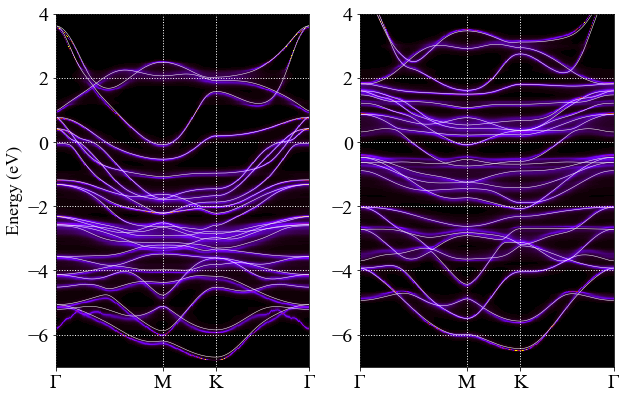

In [2]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(10,10))
ax1.set_aspect(30) 
ax2.set_aspect(30)   

im1 = ax1.pcolor(xmesh,ymesh,data2D_up, shading='nearest', cmap='gnuplot', vmin=0, vmax=0.06)
# cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
# cbar.ax1.tick_params(labelsize=18)
ax1.grid(color='white', linestyle='dotted', linewidth=1)
ax1.set_xticks([0, 100, 150, 237])
ax1.set_xticklabels(['Г', 'M', 'K', 'Г'])
ax1.set_ylabel('Energy (eV)', fontsize=18)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax1.set_xlim([0, 237])
ax1.set_ylim([-7, 4])

for i in range(24):
    ax1.plot(x,bands_up[i,:], color='white', linewidth=0.5)

  
    
im2 = ax2.pcolor(xmesh,ymesh,data2D_dn, shading='nearest', cmap='gnuplot',vmin=0, vmax=0.06)
# cbar = plt.colorbar(im2, fraction=0.05, pad=0.04)
# cbar.ax.tick_params(labelsize=18)
ax2.grid(color='white', linestyle='dotted', linewidth=1)
ax2.set_xticks([0, 100, 150, 237])
ax2.set_xticklabels(['Г', 'M', 'K', 'Г'])
ax2.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax2.set_xlim([0, 237])
ax2.set_ylim([-7, 4])

for i in range(24):
    ax2.plot(x,bands_dn[i,:], color='white', linewidth=0.5)    


fig.savefig('300.png', dpi=300)